In [3]:
# Install Libraries
# But all these libraries are already installed

! pip install numpy pandas tensorflow matplotlib seaborn 

In [4]:
# Import Libraries


import numpy as np

import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt

import seaborn as sns

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import cifar10

from sklearn.model_selection import train_test_split

In [5]:
# Load Dataset


(X_train,y_train), (X_test,y_test)=cifar10.load_data()

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Training shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)
Class distribution


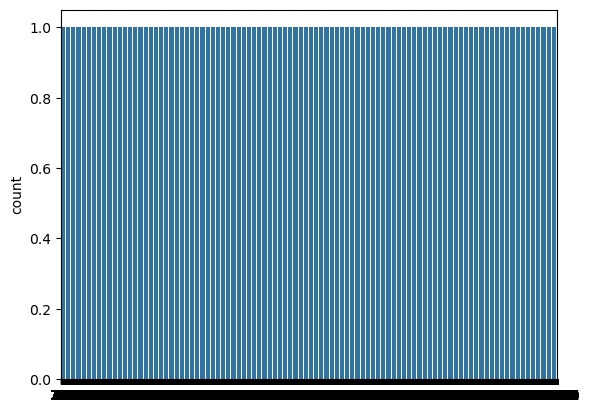

In [6]:
 # Explore Dataset


print("Training shape:",X_train.shape)

print("Test shape:",X_test.shape)

sns.countplot(y_train.flatten())

print("Class distribution")

plt.show()

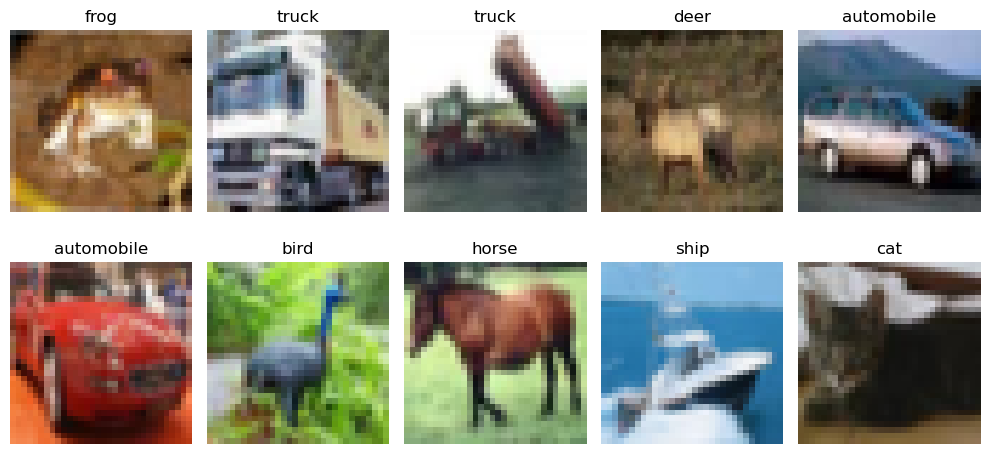

In [7]:
# Visualize Samples


plt.figure(figsize=(10,5))

for i in range(10):

    plt.subplot(2,5,i+1)

    plt.imshow(X_train[i])

    plt.title(class_names[y_train[i][0]])

    plt.axis('off')


plt.tight_layout()

plt.show()

In [8]:
#  Preprocessing




X_train=X_train/255.0

X_test= X_test/255.0


X_train,X_val,y_train,y_val= train_test_split(X_train,y_train,test_size=0.2)


y_train_cat=to_categorical(y_train,10)

y_val_cat=to_categorical(y_val,10)


y_test_cat=to_categorical(y_test,10)







In [ ]:
# Import Keras Layers

from tensorflow.keras import models,layers


# Build CNN Model



model=models.Sequential([


    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),

    layers.MaxPooling2D(2,2),

    
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)),
    


    layers.MaxPooling2D(2,2),

    
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)),


    layers.Flatten(),

    layers.Dense(64,activation='relu'),

    layers.Dense(10,activation='softmax')

])
    







In [10]:
# Compile the model


model.compile(

    optimizer='adam',

    loss='categorical_crossentropy',

    metrics=['accuracy']

)

In [ ]:
# Setup data augmentation


from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(

    rotation_range=15,

    width_shift_range=0.1,

    height_shift_range=0.1,

    horizontal_flip=True


)


datagen.fit(X_train)











In [ ]:
#  Train the model

history=model.fit(

    datagen.flow(X_train,y_train_cat,batch_size=64),

    validation_data=(X_val,y_val_cat),

    epochs=20,

    callbacks=[

        tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)


    ]

)

In [ ]:
# Save Model

model.save('BasicCNNSP.keras')


In [ ]:
# Load Pre-trained ResNet50


base_model=tf.keras.applications.ResNet50(weights='imagenet',include_top=False,input_shape=(32,32,3))

base_model.trainable=False

In [ ]:
# Build Model on Top


transfer_model= models.Sequential([

    base_model,

    layers.GlobalAveragePooling2D(),

    layers.Dense(128,activation='relu'),


    layers.Dropout(0.3),


    layers.Dense(10,activation='softmax')

                 


])

In [ ]:
 # Compile & Train


transfer_model.compile(

    optimizer='adam',

    loss='categorical_crossentropy',

    metrics=['accuracy']


)

history_data=transfer_model.fit(

    X_train,y_train_cat,

    validation_data=(X_val,y_val_cat),

    epochs=10,

    batch_size=64

    
)

In [ ]:
model.save('TransferlearningSP.keras')


In [ ]:
# Evaluate on Test Data

from sklearn.metrics import classification_report,confusion_matrix

preds=transfer_model.predict(X_train)

y_pred=np.argmax(preds,axis=1)

y_true=y_test.flatten()

print(classification_report(y_true,y_pred,target_names=class_names))



In [ ]:
# Confusion Matrix

cm=confusion_matrix(y_true,y_pred)

plt.figure(figsize=(10,8))

sns.heatmap(cm,annot=True,fmt="d",xticklabels=class_names,yticklabels=class_names)



plt.title("Confusion Matrix")

plt.xlabel("Predicted")


plt.ylabel("Actual")

plt.show()





In [25]:
! pip install streamlit

In [28]:
import os

os.makedirs("models",exist_ok=True)


model.save("TransferlearningSP.keras")